<a href="https://colab.research.google.com/github/SpaceSapiens/Code-Explorer/blob/IITM_Course/MLT_Week5_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistics Regression


Link: https://www.youtube.com/watch?v=6RWC4-QH_go&t=109s

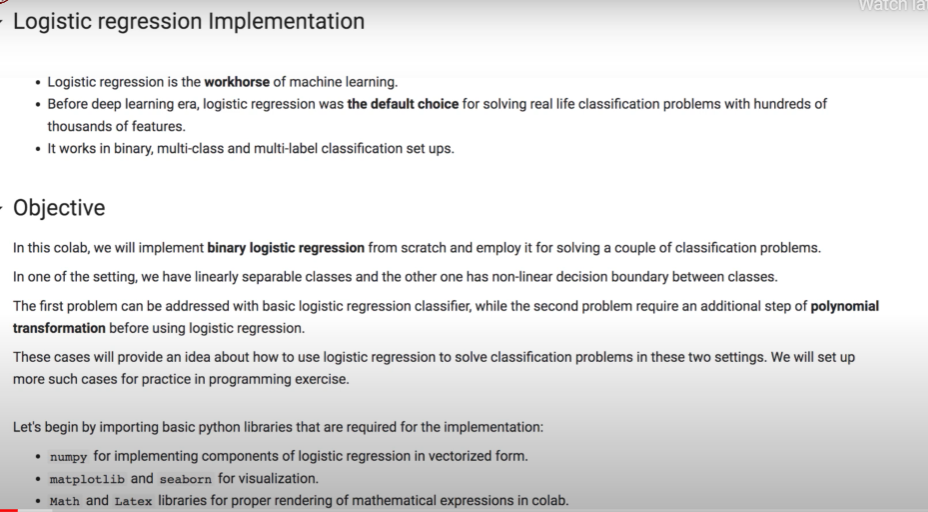

# Import Libraries

In [2]:
from IPython.display import display, Math,Latex
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Set a random seed value as a good practice
np.random.seed(1234)

# **Implementation**

# 1. Model

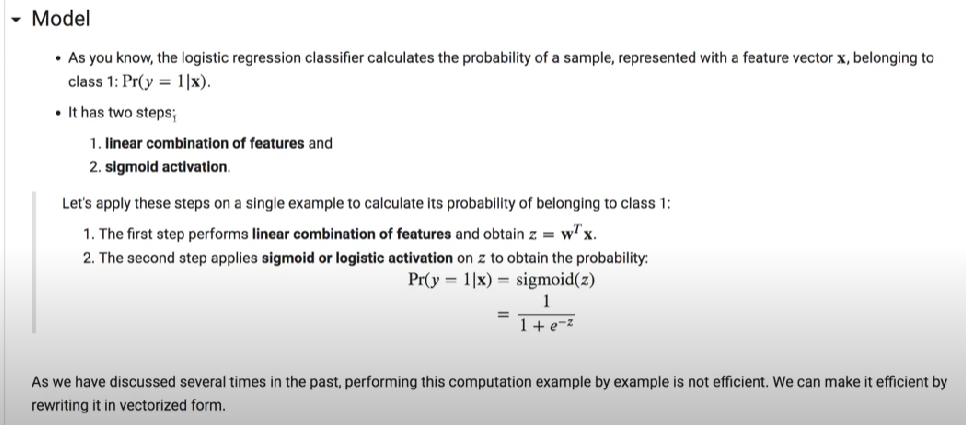

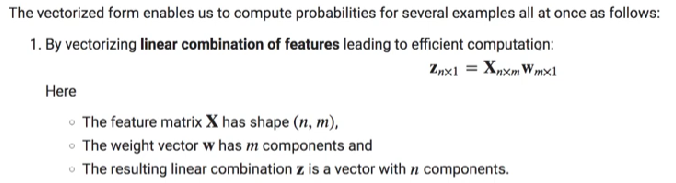

In [4]:
def linear_combination(X:np.ndarray,w:np.ndarray)->np.ndarray:
  '''
  Funtion to calculate the linear combination
  z=X.w
  Accepts X & w as arguments and return their dot product
  '''
  return X@w

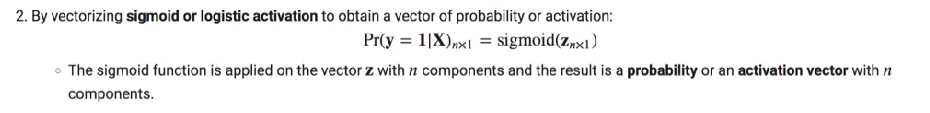

In [5]:
def sigmoid(z:np.ndarray)->np.ndarray:
  '''
  Returns the sigmoid of z
  sigmoid(z)=1/(1+e^(-z))
  Z: list of floats
  return list of sigmoid function
  '''

  return 1/1+np.exp(-z)

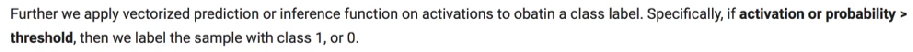

In [6]:
def predict(X:np.ndarray,w:np.ndarray,threshold:float)->np.ndarray:
  '''
  This function will predict the label based on the sigmoid of the product of X &w
  if sigmoid(X@w)>threshold, predict 1 else predict 0
  Accepts X, w as nd array and threshold as floating point reference
  returns a ndarray of preditions
  '''
  return np.where(sigmoid(linear_combination(X,w))>threshold,1,0)

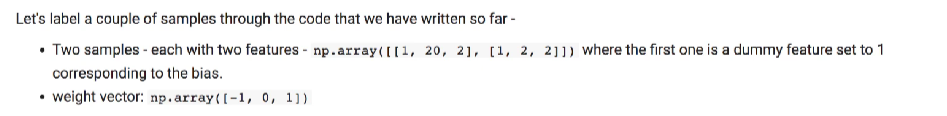

In [8]:
feature_matrix=np.array([[1,20,2],[1,2,2]])
weight_vector=np.array([-1,0,1])

print("Shape of feature Matrix:",feature_matrix.shape)
print("Shape of weight vector:",weight_vector.shape)

class_labels=predict(feature_matrix,weight_vector,0.5)
print("Shape of output:", class_labels.shape)
print("Output:",class_labels)

Shape of feature Matrix: (2, 3)
Shape of weight vector: (3,)
Shape of output: (2,)
Output: [1 1]


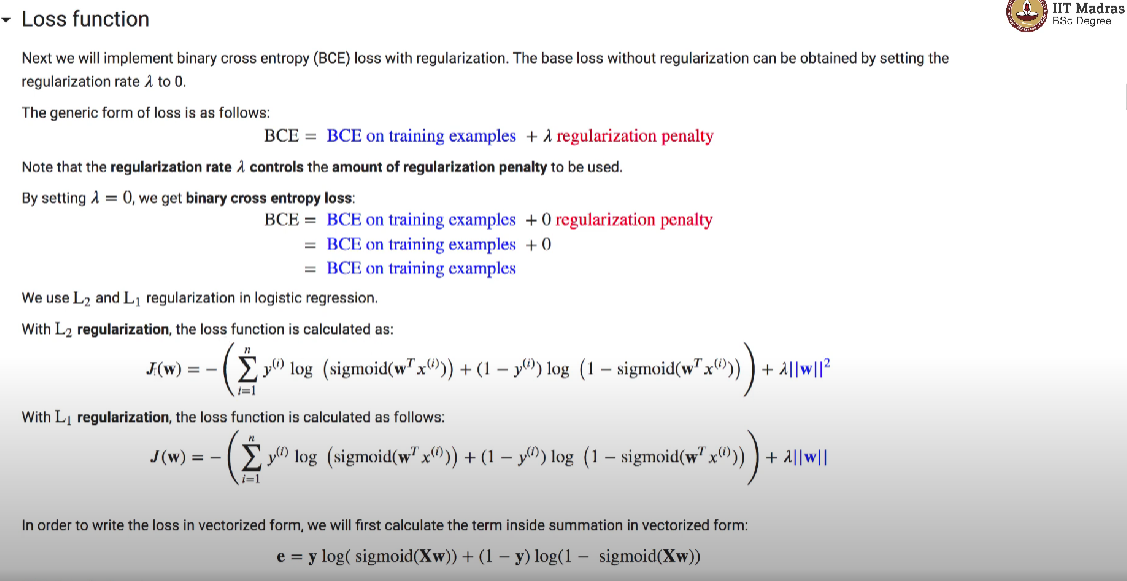

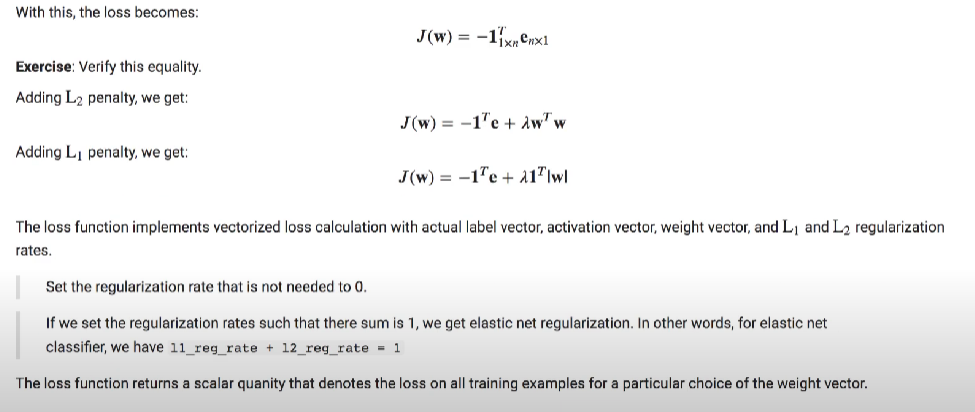

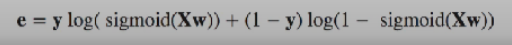

In [9]:
def loss(y,sigmoid_vector,weight_vector,l1_reg_rate,l2_reg_rate):
  return (-1*(np.sum(y*np.log(sigmoid_vector)+(1-y)*np.log(1-sigmoid_vector)))
          + l2_reg_rate*np.dot(np.transpose(weight_vector),weight_vector)
          + l1_reg_rate*np.sum(np.abs(weight_vector)))

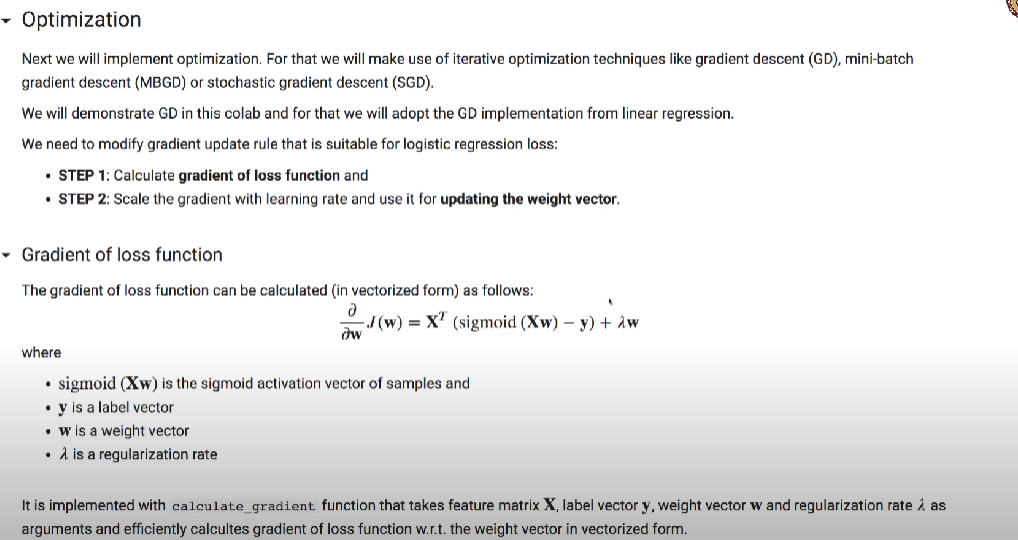

In [10]:
def calculate_gradient(X:np.ndarray,y:np.ndarray,w:np.ndarray,reg_rate:float)->np.ndarray:
  '''
  Funtion to calculate the gradient
  '''
  return np.transpose(X)@(sigmoid(linear_combination(X,w))-y)+reg_rate*w

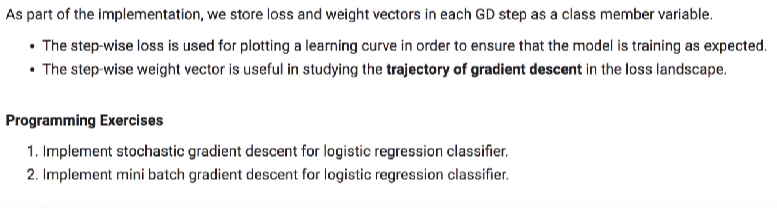

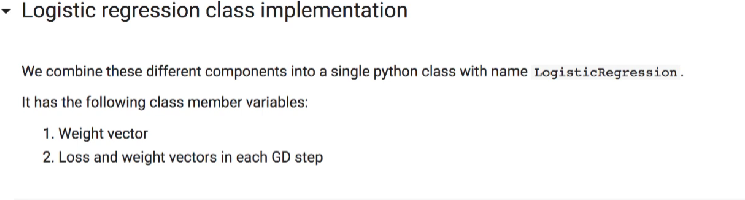

In [11]:
class LogisticRegression(object):
  '''
  Class to implement all functions of Logistic Regression
  '''
  def set_weight_vector(self,w):
    self.w=w
  '''
  Modify the above functions by replacing the w, as it is readily available in then class
  '''
  def linear_combination(self,X:np.ndarray)->np.ndarray:
    '''
    Funtion to calculate the linear combination
    z=X.w
    '''
    return X@self.w
  def sigmoid(self,z:np.ndarray)->np.ndarray:
    '''
    Returns the sigmoid of z
    sigmoid(z)=1/(1+e^(-z))
    Z: list of floats
    return list of sigmoid function
    '''

    return 1/1+np.exp(-z)
  def activation(self,X:np.ndarray)->np.ndarray:
    '''
    Calculate sigmoid activation using feature and weigt
    '''
    return self.sigmoid(self.linear_combination(X))
  
  def predict(self,X:np.ndarray,threshold:float)->np.ndarray:
    '''
    This function will predict the label based on the sigmoid of the product of X &w
    if sigmoid(X@w)>threshold, predict 1 else predict 0
    Accepts X, w as nd array and threshold as floating point reference
    returns a ndarray of preditions
    '''    
    return np.where(self.activation(X)>threshold,1,0)
  def loss(self,X:np.ndarray,y,reg_rate):
    '''
    Implementing only L2 regularization
    '''
    predicted_prob=self.activation(X)
    return (-1*(np.sum(y*np.log(predicted_prob)+(1-y)*np.log(1-predicted_prob)))
            + reg_rate*np.dot(np.transpose(self.w),self.w))
  def calculate_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
    '''
    Funtion to calculate the gradient
    '''
    return np.transpose(X)@(self.activation(X)-y)+reg_rate*self.w
  
  def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
    '''
    updated weight-w-learning rate * gradient
    '''
    return (self.w-lr*grad)
  
  def gd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float,reg_rate:float)->np.ndarray:
    '''
    Estimate parameters of linear regression model using gradient descent

    '''
    self.w=np.zeros(X.shape[1])
    self.w_all=[]
    self.err_all=[]
    for i in range(0, num_epochs):
      dJdw=self.calculate_gradient(X,y,reg_rate)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w=self.update_weights(dJdw,lr)
    return self.w
        

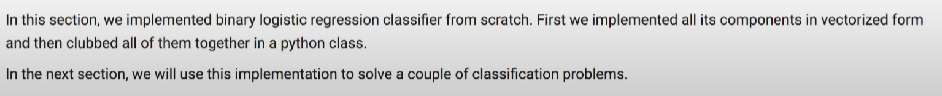